# Content
# Attribute Information:

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [5]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Reading data
df = pd.read_csv("data/cleveland_short.csv")

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    int64  
 1   sex       282 non-null    int64  
 2   cp        282 non-null    int64  
 3   trestbps  282 non-null    int64  
 4   chol      282 non-null    int64  
 5   fbs       282 non-null    int64  
 6   restecg   282 non-null    int64  
 7   thalach   282 non-null    int64  
 8   exang     282 non-null    int64  
 9   oldpeak   282 non-null    float64
 10  slope     282 non-null    int64  
 11  ca        282 non-null    int64  
 12  thal      282 non-null    int64  
 13  num       282 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 31.0 KB


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [10]:
df.shape

(282, 14)

In [11]:
# checking dataset is balanced or not
target_true_count = len(df.loc[df['num'] == 1])+len(df.loc[df['num'] == 2])+len(df.loc[df['num'] == 3])+len(df.loc[df['num'] == 4])
target_false_count = len(df.loc[df['num'] == 0])

In [12]:
target_true_count, target_false_count

(125, 157)

<AxesSubplot:xlabel='num', ylabel='count'>

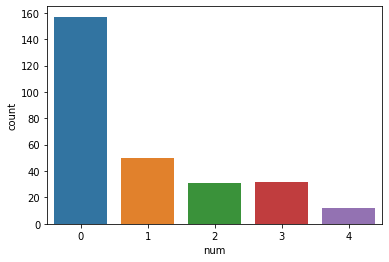

In [13]:
# plotting graph for output classes counts
sns.countplot(x = 'num',data = df)

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.595745,4.581560,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,1.236910,2.248467,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-9.000000,-9.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'num'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

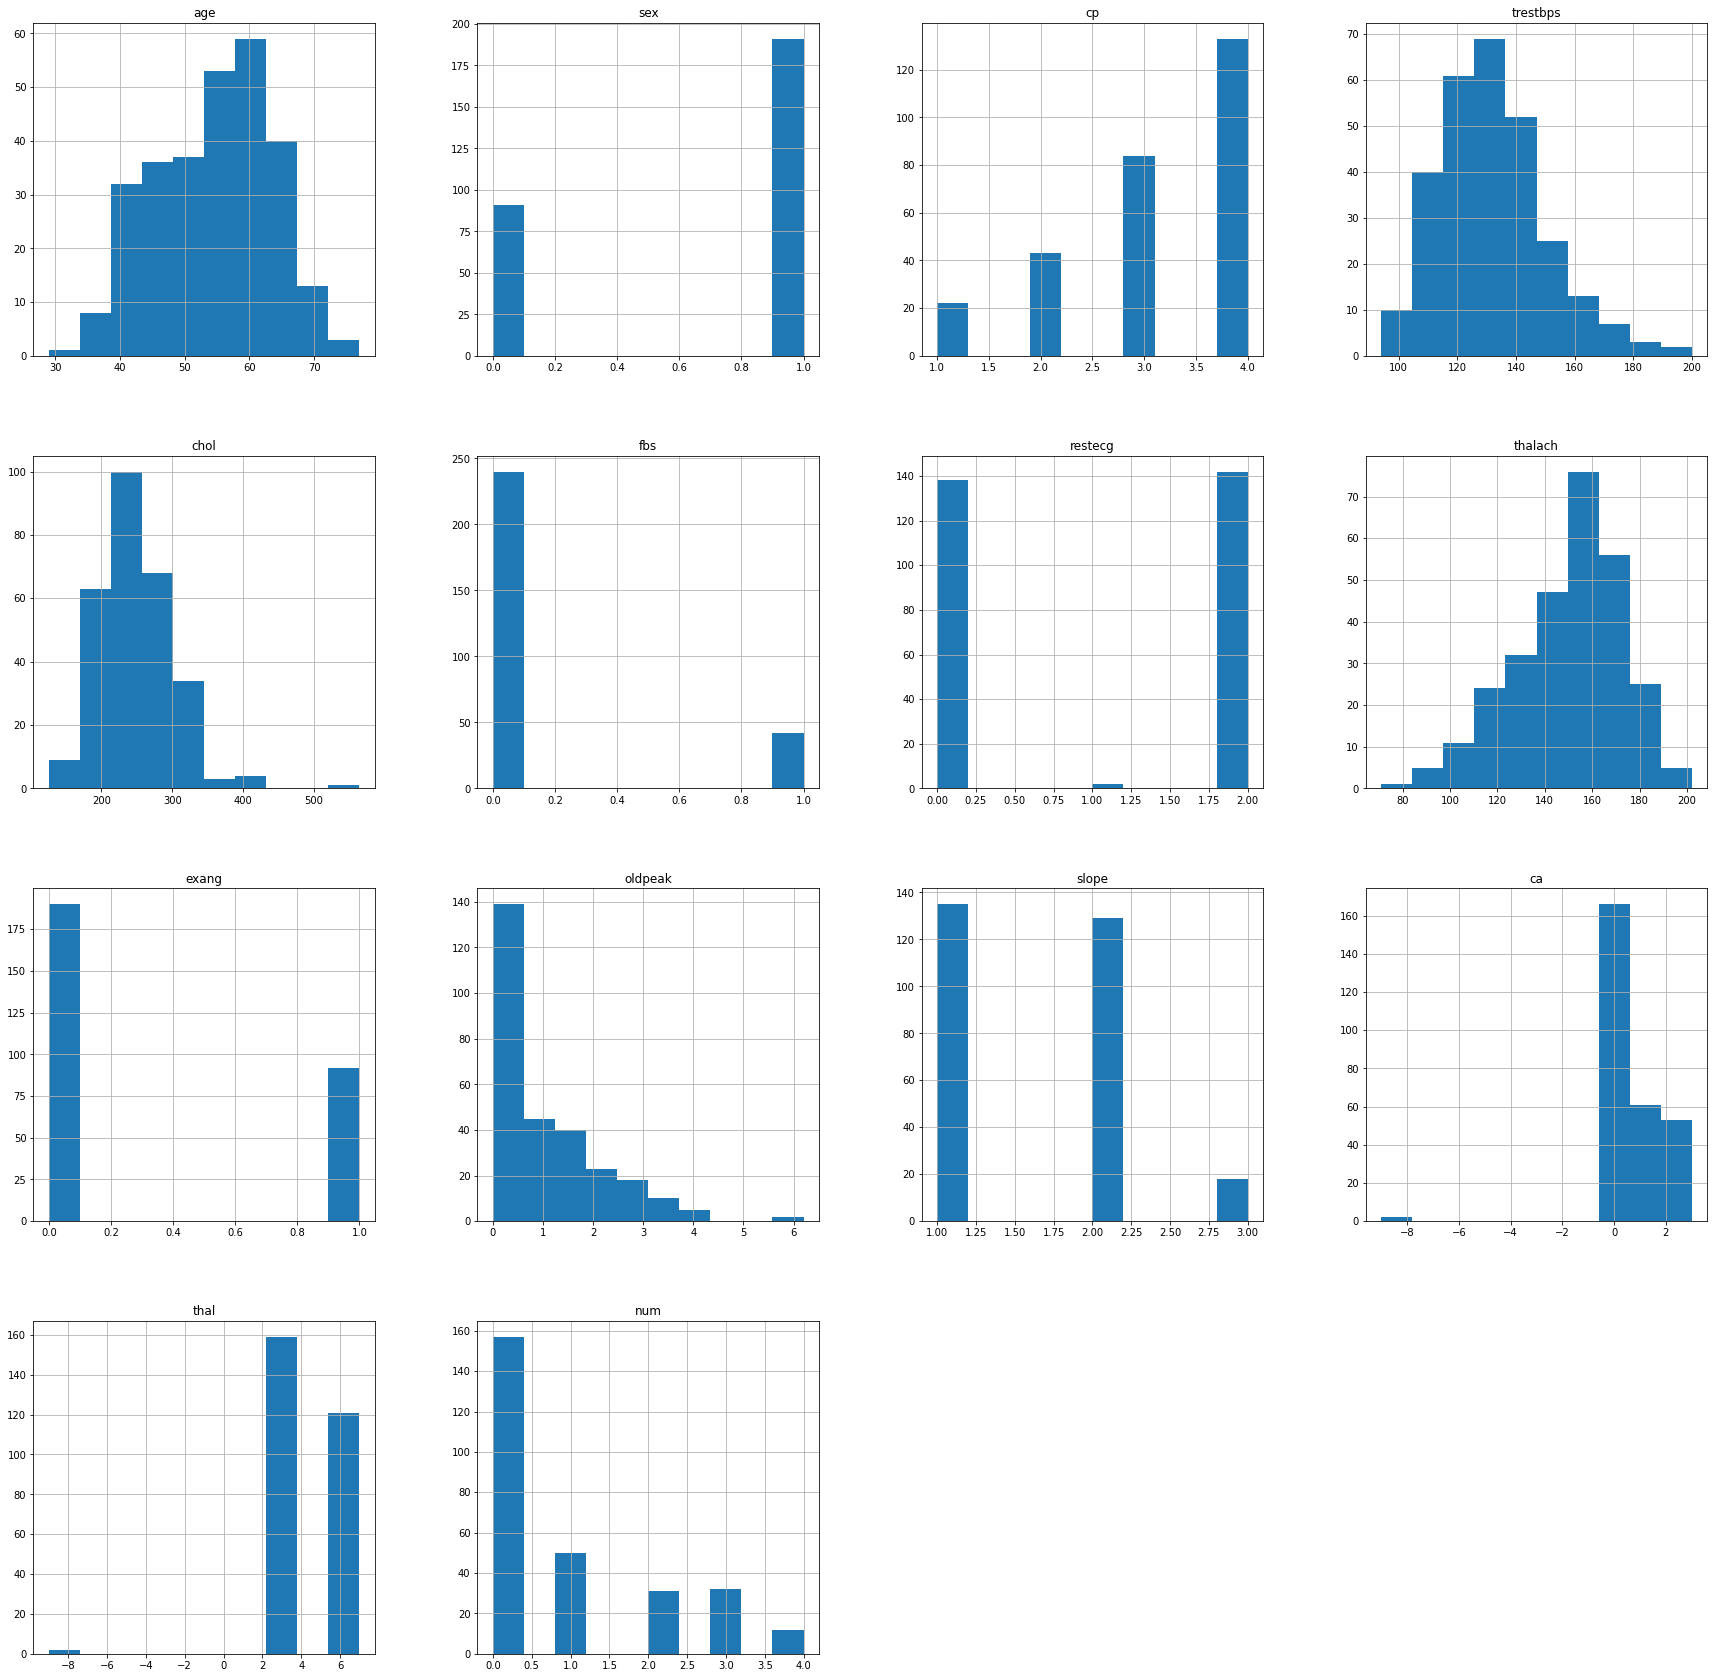

In [15]:
# plotting variation graphs for each property
df.hist(figsize = (30,30))

In [16]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.091125,0.077383,0.274466,0.218295,0.104400,0.134438,-0.393266,0.087174,0.195740,0.156108,0.310778,0.098522,0.210747
sex,-0.091125,1.000000,0.022619,-0.058920,-0.189397,0.054396,0.032665,-0.054792,0.189095,0.103771,0.040438,0.032023,0.351200,0.239516
cp,0.077383,0.022619,1.000000,-0.070886,0.098889,-0.071550,0.061007,-0.318512,0.364757,0.173221,0.147143,0.137307,0.207487,0.383891
trestbps,0.274466,-0.058920,-0.070886,1.000000,0.157118,0.142902,0.128652,-0.029739,0.061072,0.197026,0.137713,0.049786,0.114580,0.151776
chol,0.218295,-0.189397,0.098889,0.157118,1.000000,0.019506,0.166490,-0.018392,0.088988,0.044771,0.000546,0.113725,0.068692,0.098895
fbs,0.104400,0.054396,-0.071550,0.142902,0.019506,1.000000,0.054025,0.019948,0.027573,-0.024812,0.056060,0.032096,0.011425,0.039690
restecg,0.134438,0.032665,0.061007,0.128652,0.166490,0.054025,1.000000,-0.082132,0.088781,0.107675,0.155901,0.085372,0.018511,0.187365
thalach,-0.393266,-0.054792,-0.318512,-0.029739,-0.018392,0.019948,-0.082132,1.000000,-0.374316,-0.344748,-0.384825,-0.207674,-0.193018,-0.396194
exang,0.087174,0.189095,0.364757,0.061072,0.088988,0.027573,0.088781,-0.374316,1.000000,0.285568,0.263093,0.093060,0.271263,0.398880
oldpeak,0.195740,0.103771,0.173221,0.197026,0.044771,-0.024812,0.107675,-0.344748,0.285568,1.000000,0.600446,0.240947,0.305171,0.487529


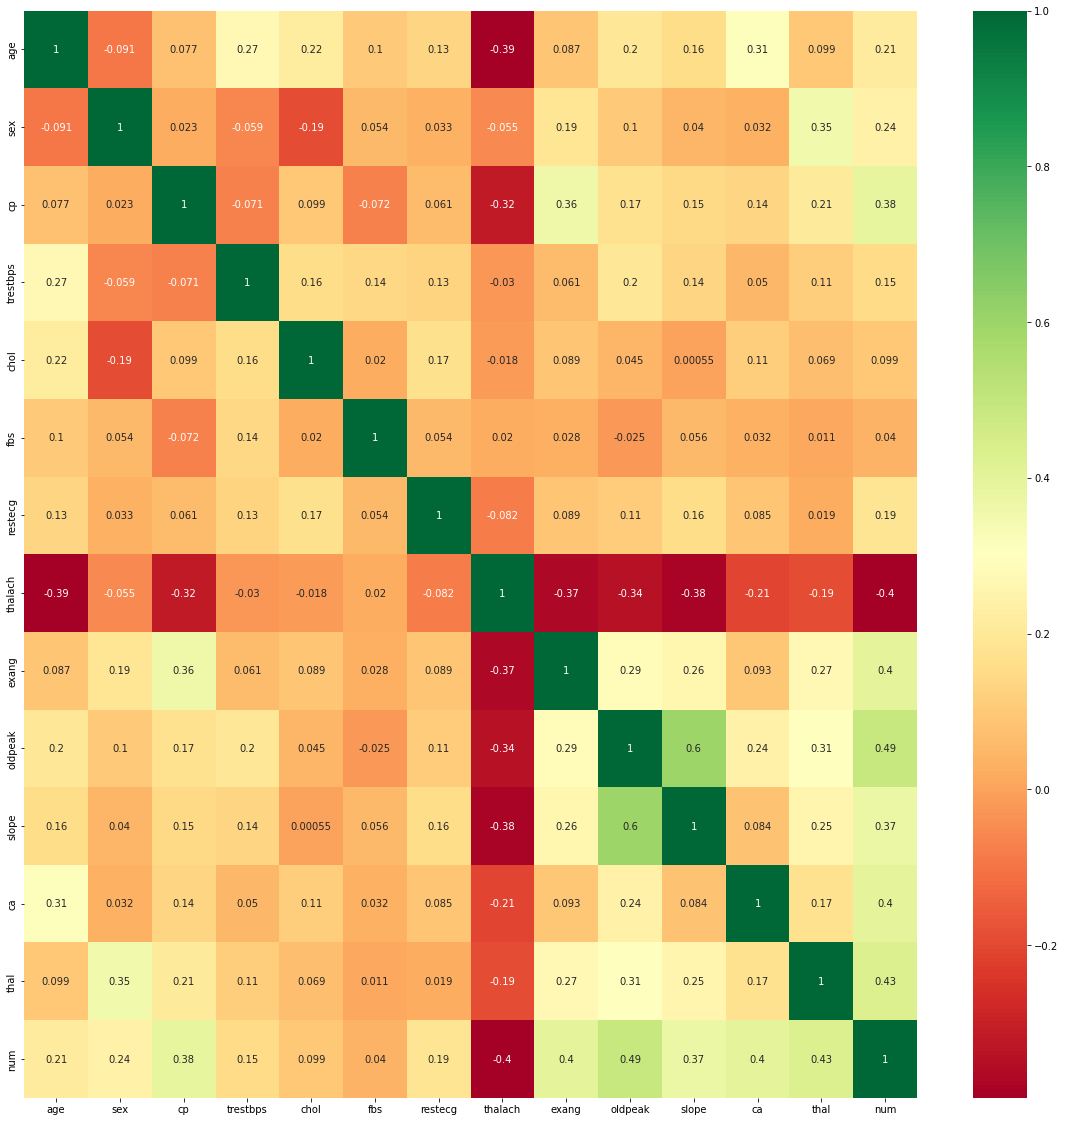

In [17]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

##### Checking if data has 0 values present

In [19]:
print("Age: {0}".format(len(df.loc[df['age'] == 0])))
print("gender: {0}".format(len(df.loc[df['sex'] == 0])))
print("chest pain type: {0}".format(len(df.loc[df['cp'] == 0])))
print("resting blood pressure: {0}".format(len(df.loc[df['trestbps'] == 0])))
print("serum cholestoral: {0}".format(len(df.loc[df['chol'] == 0])))
print("fasting blood sugar: {0}".format(len(df.loc[df['fbs'] == 0])))
print("resting electrocardiographic results: {0}".format(len(df.loc[df['restecg'] == 0])))
print("maximum heart rate achieved: {0}".format(len(df.loc[df['thalach'] == 0])))
print("exercise induced angina: {0}".format(len(df.loc[df['exang'] == 0])))
print("oldpeak : {0}".format(len(df.loc[df['oldpeak'] == 0])))
print("the slope of the peak exercise ST segment: {0}".format(len(df.loc[df['slope'] == 0])))
print("number of major vessels (0-3) colored by flourosopy: {0}".format(len(df.loc[df['ca'] == 0])))
print("thal: {0}".format(len(df.loc[df['thal'] == 0])))

Age: 0
gender: 91
chest pain type: 0
resting blood pressure: 0
serum cholestoral: 0
fasting blood sugar: 240
resting electrocardiographic results: 138
maximum heart rate achieved: 0
exercise induced angina: 190
oldpeak : 91
the slope of the peak exercise ST segment: 0
number of major vessels (0-3) colored by flourosopy: 166
thal: 0


##### preparing the data

In [21]:
from sklearn.model_selection import train_test_split
feature_columns = ['age', 'sex', 'cp','trestbps', 'chol', 'restecg', 'thalach', 'exang' , 'oldpeak', 'slope', 'ca', 'thal']
predicted_class = ['num']

In [22]:
X = df[feature_columns]
y = df[predicted_class]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

##### filling in 0 values

In [23]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

model = random_forest_model.fit(X_train, y_train)

In [25]:
predict_train_data = model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.541


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_train_data)
cm

array([[41,  5,  1,  1,  0],
       [ 8,  2,  0,  1,  0],
       [ 2,  4,  1,  4,  0],
       [ 3,  5,  0,  2,  0],
       [ 1,  2,  0,  2,  0]])

In [27]:
import joblib
joblib.dump(model, "./random_forest_heart.joblib")

['./random_forest_heart.joblib']

In [29]:
from xgboost import XGBClassifier
xg_model = XGBClassifier(random_state=42)

model_1 = xg_model.fit(X_train, y_train)

[19:58:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [30]:
predict_train_data = model_1.predict(X_test)

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.541


In [31]:
cm = confusion_matrix(y_test, predict_train_data)
cm

array([[39,  5,  2,  2,  0],
       [ 5,  2,  2,  2,  0],
       [ 2,  1,  3,  5,  0],
       [ 2,  5,  1,  2,  0],
       [ 1,  3,  0,  1,  0]])